### Univariate visualization


In [65]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_palette("Set3")
df = sns.load_dataset("iris")

##### Bar Charts

- for categorical values
- The Counts have to start from 0 (don't zoom in!)
- Don't sort ordinal data by frequency
- Dont use different colors for the bars if the categories are clear
- The relative frequency (%) instead of counts might be useful

In [66]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


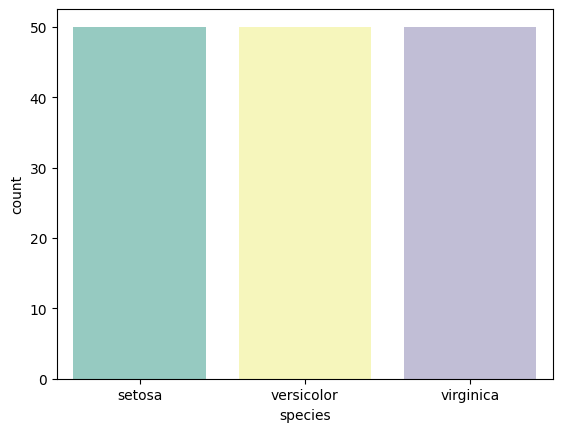

In [67]:
# Simple count plot with seaborn
sns.countplot(df, x="species");

<BarContainer object of 3 artists>

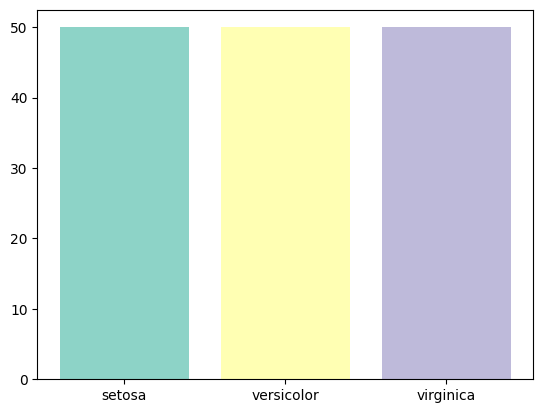

In [68]:
# bar plot in matplotlib
df.groupby("species").count()
plt.bar(df.species.unique(), df.groupby("species")["species"].count(), color=sns.color_palette("Set3"))

#### Pie Charts

- For qualitative variables
- Area indicates frequency
- Useful when you want to show how the data is broken into parts
- Low number of slices is better (2 or 3)
- Start clockwise at the top

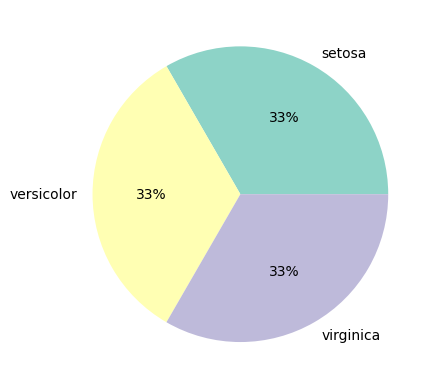

In [69]:
plt.pie(df.groupby("species")["species"].count(), labels=df.species.unique(), autopct='%.0f%%');

#### Histograms

- Used to plot the distribution of a numeric value
- Quantitative version of the bar chart
- Values are grouped into continuous bins

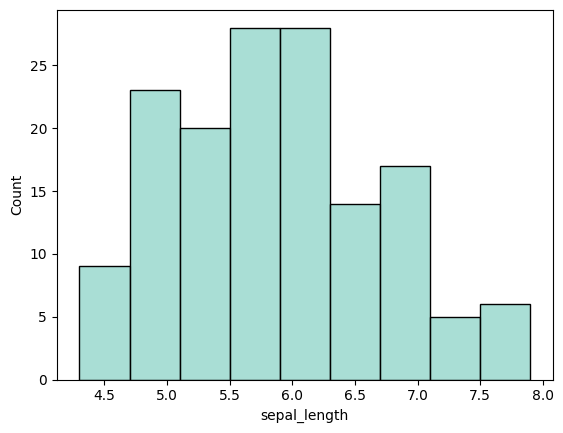

In [70]:
# Seaborn
sns.histplot(data=df, x="sepal_length");

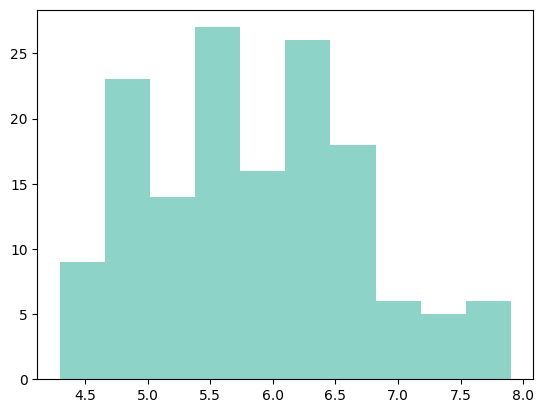

In [71]:
# matplotlib
plt.hist(df["sepal_length"]);

How do you get the correct number of bins?
[Freedman-Diaconis!](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule)

$Bin width = 2 * \dfrac{IQR(x)} {\sqrt[3]{n}}$


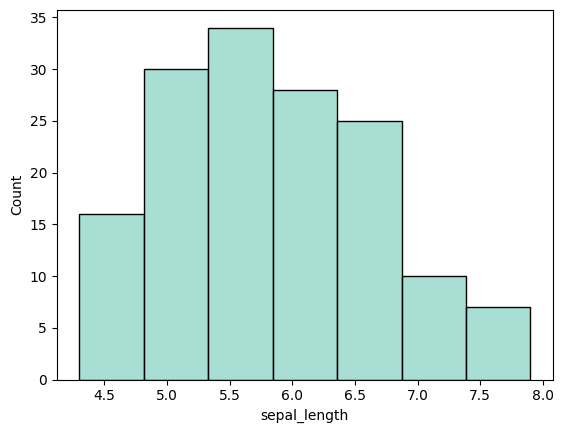

In [72]:
q75, q25 = np.percentile(df["sepal_length"], [75 ,25])
iqr = q75 - q25

bin_width = 2*iqr / len(df) ** (1/3)
bins = round((df["sepal_length"].max() - df["sepal_length"].min())/bin_width)

sns.histplot(data=df, x="sepal_length", bins = bins);
